# Gaussian Mixture Models (GMM)

Como funciona:

En este método la idea es que cluster va a modelar una distribucion gaussiana multivariada, entonces un punto inicialmente puede pertenecer parcialmente a uno o varios clusters y va seleccionando el cluster que se asocie mejor asumiendo distribucion gaussiana. Aquí, los clusters tienden a agruparse en formas elípticas.

Necesita que le digamos cuantos clusters son iniciales. Como para páramentos objetivos es estimar los párametros de una mezcla gaussiana a partir de los datos no etiquetados iniciales que le entregamos (medias, covarianzas, pesos).

En K-Means lo que haciamos era calcular las distancias para ir seleccionando los clusters, aqui lo que hacemos es calcular la probabilidad de que el punto pertenezca al cluster a partir de la distribucion que ocurre dentro del cluster y los pesos dentro del mismo. Los párametros a actualizar son los de la gaussiana.

El criterio de parada es si la mejora de la log-verosimilitud es menor a un umbral.

Carguemos las librerías y el dataset que utilizaremos para la realización de este modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

Preprocesamiento.

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

Definamos el modelo y "entrenemoslo".

In [ ]:
gmm = GaussianMixture(n_components=3, #Numero de gaussianas (clusters)
                      covariance_type='full', #Tipo de covarianza (entre clusters)
                      max_iter=100, #Numero maximo de iteraciones del alg EM
                      tol=1e-3, #Tolerancia para la convergencia del alg EM
                      init_params='kmeans', #Metodo de inicializacion ptos iniciales
                      random_state=42)
gmm.fit(X_scaled)

GaussianMixture(n_components=3, random_state=42)

Predicción.

In [ ]:
gmm_labels = gmm.predict(X_scaled)

Visualicemos las etiquetas predichas por el modelo.

In [ ]:
gmm_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
X.shape

(178, 13)

Notemos que el dataset tiene 13 variables por lo que haremos una reduccion de dimensionalidad por PCA para visualizar.

In [ ]:
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

Lo que hacemos es tomar la reduccion de los datos y para visualizarlos en clusters le damos como colores las diferentes etiquetas obtenidas por el método.

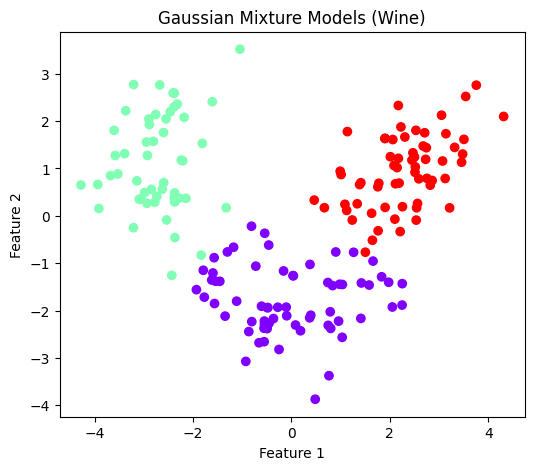

In [ ]:
plt.figure(figsize=(6,5))
plt.title("Gaussian Mixture Models (Wine)")

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Veamos que ocurre si como criterio de eleccion de los puntos iniciales usamos random.

In [ ]:
gmm_random = GaussianMixture(n_components=3,
                      covariance_type='full',
                      max_iter=100,
                      tol=1e-3,
                      init_params='random',
                      random_state=42)
gmm_random.fit(X_scaled)
gmm_random_labels = gmm_random.predict(X_scaled)

Visualicemos los clusteres predichos.

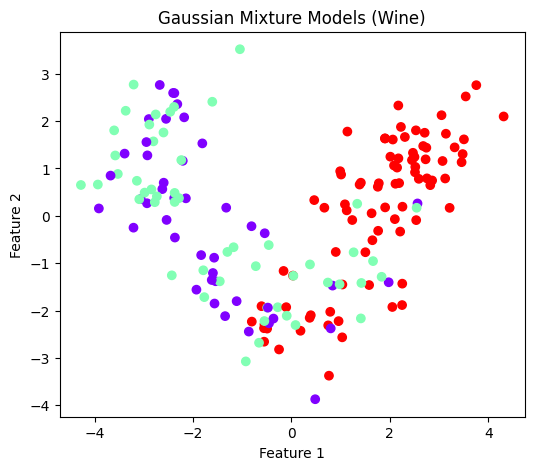

In [ ]:
plt.figure(figsize=(6,5))
plt.title("Gaussian Mixture Models (Wine)")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_random_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()